[1.0, 2.0]


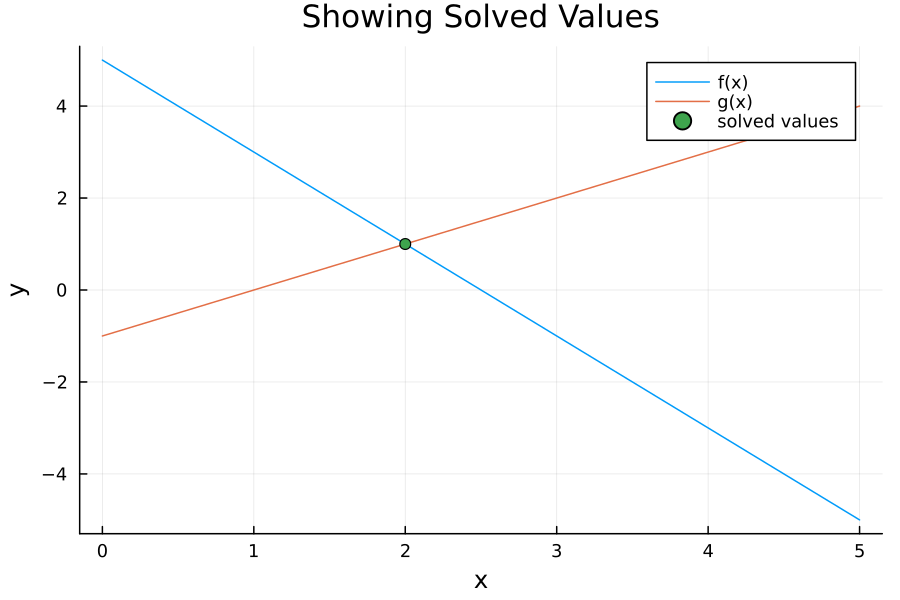

In [1]:
using LinearAlgebra
using Plots


function main()

    # vector_ops()
    matrix_ops()

end

function vector_ops()
    x = [1, 2, 3]
    y = [1; 2; 3]
    z = [1 2 3]
    q = [1 2 3; 4 5 6]

    # display(x)
    # display(y)
    # display(z)
    # display(q)

    # norm
    # println(norm(x))
    # println(x / norm(x))
    # println(normalize(x))

    # dot product
    # println(dot(x, y))
    # println(x ⋅ y)

    # cross product
    println(cross(x,y))
    println(x × y)

end

function matrix_ops()

    A = [0 2 4; 2 4 2; 3 3 1]
    B = ones(3,3)
    C = [1 1; 1 1; 1 1]

    # matrix multiplication
    # display(A * B)
    # display(A * C)

    # elementwise multiplication
    # display(A .* B)

    # special operations
    # println(tr(A))
    # println(det(A))
    # display(transpose(A))
    # display(eigvals(A))
    # display(eigvecs(A))
    # display(inv(A))

    # special matrices
    # D = [1 0 0; 0 1 0; 0 0 1]
    # display(D)
    # D = Diagonal(D)

    # linear system Ax = b
    A = [1 2; 1 -1]
    b = [5, -1]

    # A = factorize(A)
    # display(A)
    # display(A.L * A.U)

    x0 = A \ b

    xlin = range(0, 5, length=50)
    f(x) = 5 - 2x
    g(x) = -1 + x

    println(x0)

    plot(xlin, f.(xlin), label="f(x)", xaxis="x", yaxis="y")
    plot!(xlin, g.(xlin), label="g(x)", title="Showing Solved Values")
    scatter!((x0[2], x0[1]), label="solved values", dpi=150)
end


main()

# Linear Algebra Julia

We aim to solve Ax = b

We start with classical 1D Laplace problem

$$
\begin{cases}
U_{xx}(x) = f(x) & \quad \text{for $x \in (0,1)$}\\ 
U(0) = \alpha \\
U(1) = \beta
\end{cases}
$$

See my notebook on that, later write the markdown part of it.

In [9]:
# Problem definition

α = 1
β = 1

f(x) = exp(x)


# Create spatial grid: 

N = 1000
L = 1
h = L/(N+1)

x = LinRange(0,1,N+2)
xinner = x[2:N+1]

1000-element LinRange{Float64, Int64}:
 0.000999001,0.001998,0.002997,0.003996,…,0.996004,0.997003,0.998002,0.999001

In [13]:
function fillmat!(A)
    for i in 1:N
        A[i,i] = -2
        if i<N
            A[i,i+1] = 1
        end
        if i>1 
            A[i,i-1] = 1
        end
    end
end


A = Matrix{Float64}(undef,N,N)
fillmat!(A)
    


In [14]:
A

1000×1000 Matrix{Float64}:
 -2.0   1.0   0.0   0.0   0.0   0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  1.0  -2.0   1.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   1.0  -2.0   1.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   1.0  -2.0   1.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   1.0  -2.0   1.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   1.0  -2.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   1.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  ⋮                             ⋮    ⋱         ⋮                      
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  

In [15]:
B =Matrix{Float64}(undef, 2,2)

2×2 Matrix{Float64}:
 8.13039e-316  8.1304e-316
 8.1304e-316   8.1304e-316